In [1]:
# Dataset: customers.csv

# Tasks To Be Performed:

# 1. K-Means Clustering:
# ● Load customer data
# ● Check the number of cells in each column with null values
# ● Create a scatter plot with Age as X and Spending Score as Y
# ● Find out the best number for clusters between 1 and 10 (inclusive)
# using the elbow method
# ● Draw a scatter plot displaying data points colored on the basis of
# clusters


In [2]:
import pandas as pd

df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

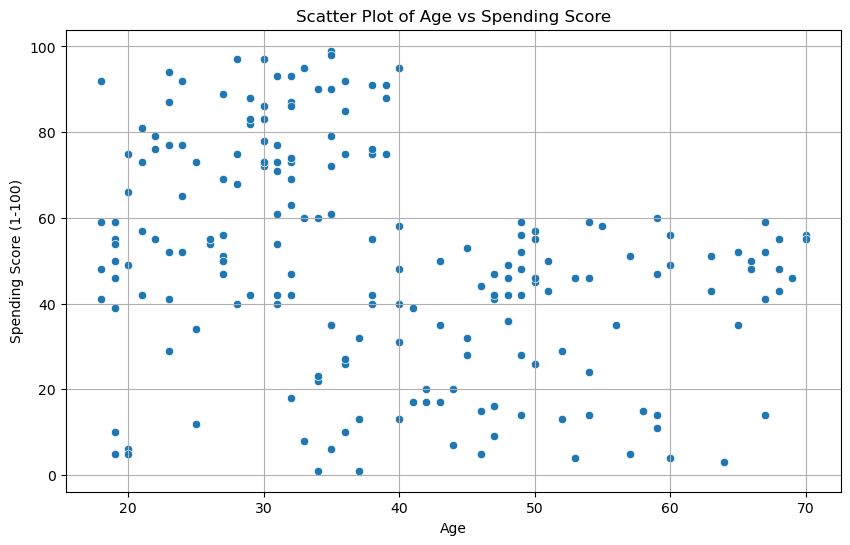

In [4]:
# ● Create a scatter plot with Age as X and Spending Score as Y

import matplotlib.pyplot as plt
import seaborn as sns

y = df['Spending Score (1-100)']
x = df['Age']

plt.figure(figsize=(10, 6))
sns.scatterplot(df,x=x,y=y,)
plt.title('Scatter Plot of Age vs Spending Score')
plt.grid(True)

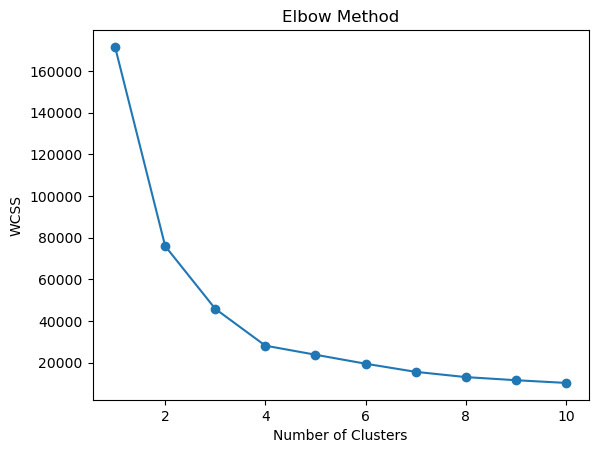

In [9]:
# ● Find out the best number for clusters between 1 and 10 (inclusive)
# using the elbow method
from sklearn.cluster import KMeans

# Prepare data for clustering (using 'Age' and 'Spending Score (1-100)')
X = df[['Age', 'Spending Score (1-100)']].values

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


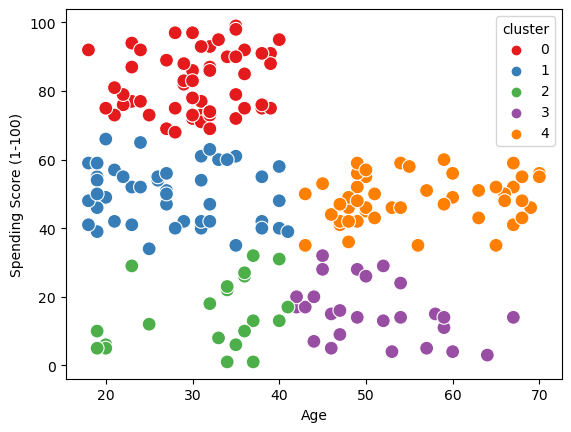

In [15]:
# ● Draw a scatter plot displaying data points colored on the basis of
# clusters

kmeans = KMeans(n_clusters=5,init='k-means++',random_state=8)

df['cluster'] = kmeans.fit_predict(X)


sns.scatterplot(x=x,y=y,hue=df['cluster'],palette='Set1', s=100)
plt.show()